In [174]:
import kneed
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn import cluster

data = pd.read_csv('Country-data.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [176]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [177]:
data.duplicated().sum()

0

In [178]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [179]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

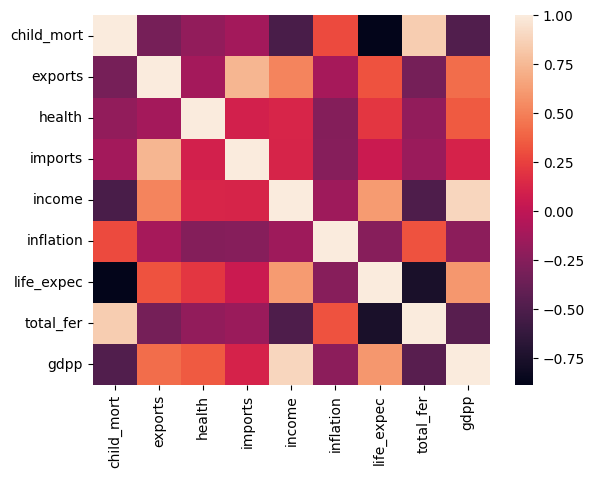

In [180]:
sns.heatmap(data.corr())

In [181]:
normalized_data = MinMaxScaler().fit_transform(data.drop(['country'],axis=1))
normalized_data = pd.DataFrame(normalized_data,columns=data.drop(['country'],axis=1).columns)
display(normalized_data)

normalized_data_country = normalized_data.copy()
normalized_data_country['country'] = data['country']
cols = normalized_data_country.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_data_country = normalized_data_country[cols]
display(normalized_data_country)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,Yemen,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [ ]:
result_data = pd.DataFrame()
result_data['methods'] = ['AffinityPropagation','Birch','DBSCAN','OPTICS','SpectralClustering']
result_data.set_index('methods',inplace=True)
for country in normalized_data_country['country']:
    result_data[country] = 0

display(result_data)

array([13,  0,  8, 13,  0,  4,  4, 16,  3,  8, 16,  5,  4,  0,  0,  3,  2,
       13,  2,  4, 15,  2, 15, 10,  0, 13,  1,  2, 13, 16,  2, 13, 13,  0,
        4,  4,  6, 13,  6, 15, 13,  0,  5,  5,  3,  4,  4,  4,  4, 13,  6,
        5,  2, 16, 16,  6, 13, 15, 16,  6, 16,  4,  4, 13, 13,  2,  7,  5,
       16,  4,  8,  4,  6,  3, 16, 16,  4, 16,  2,  8,  6,  9, 10,  2,  6,
        0,  0,  9,  9,  8,  5, 11,  0,  6, 13,  5,  5, 13, 12,  6,  0,  9,
       15,  8, 15,  4, 13,  4,  2,  4,  3, 16, 13, 14,  3,  8,  6,  5,  2,
        4,  2,  0, 16, 10,  0,  8,  9,  2,  8,  6, 15,  5,  1, 12,  5,  5,
        9,  2,  0, 16,  8,  4,  6,  4,  3,  3,  6, 13,  5,  1, 13,  4,  0,
        4,  2,  1,  0, 10, 16,  3,  4,  4,  2,  8,  0,  6, 13],
      dtype=int64)

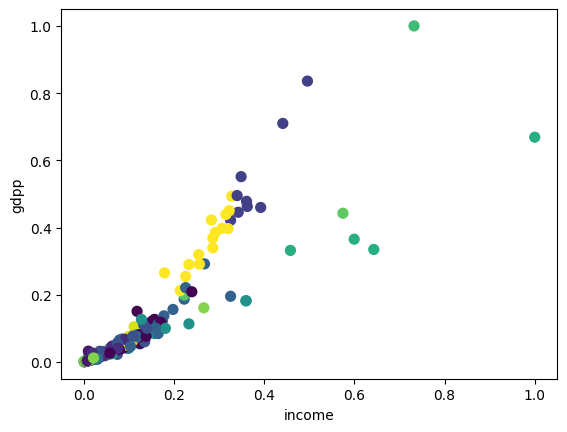

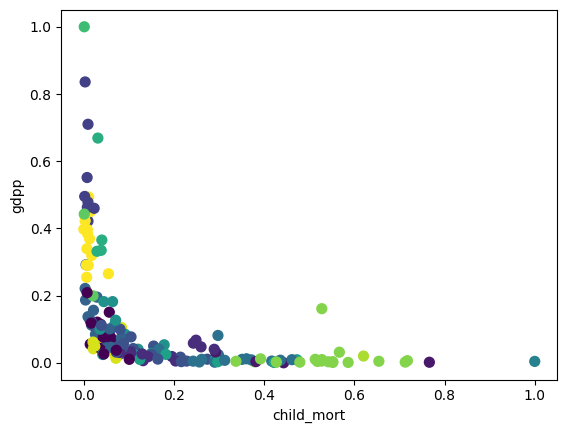

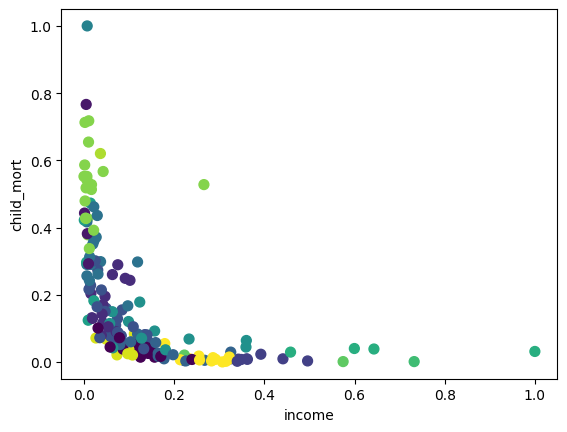

In [196]:
data_affinity = cluster.AffinityPropagation(damping=0.9).fit_predict(normalized_data)

#не знаю, що тут обрати
#не знаю як подивитись значення
display(data_affinity)

plt.scatter(normalized_data["income"], normalized_data["gdpp"], c=data_affinity,s=50)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["child_mort"], normalized_data["gdpp"], c=data_affinity,s=50)
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["income"], normalized_data["child_mort"], c=data_affinity,s=50)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.show()

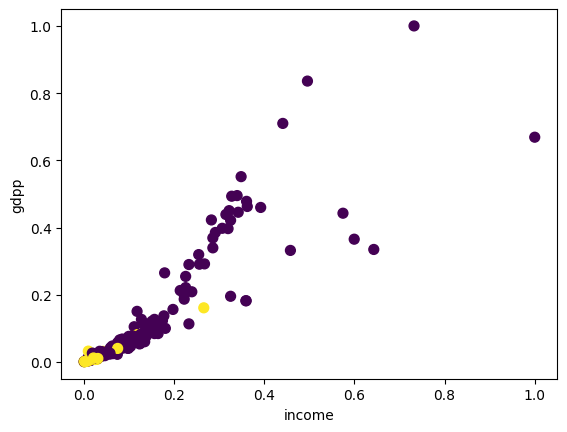

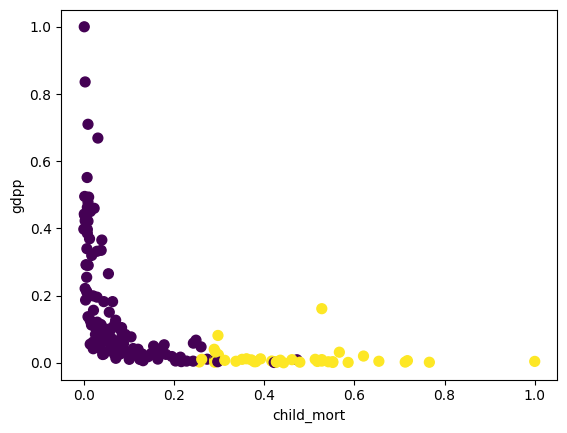

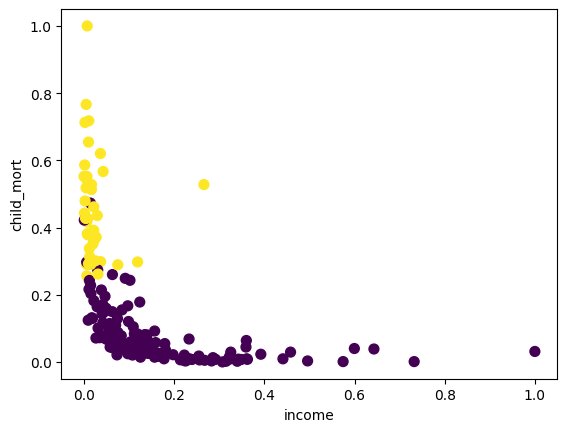

In [184]:
data_birch= cluster.Birch(threshold=0.01, n_clusters=2).fit_predict(normalized_data)

plt.scatter(normalized_data["income"], normalized_data["gdpp"], c=data_birch,s=50)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["child_mort"], normalized_data["gdpp"], c=data_birch,s=50)
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["income"], normalized_data["child_mort"], c=data_birch,s=50)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.show()

#1-жовтий, 0 - фіолетовий, не знаю як про це дізнатись нормально
#обрав жовтий
for i in np.where(data_birch==1)[0]:
    result_data.iat[1,i]+=1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

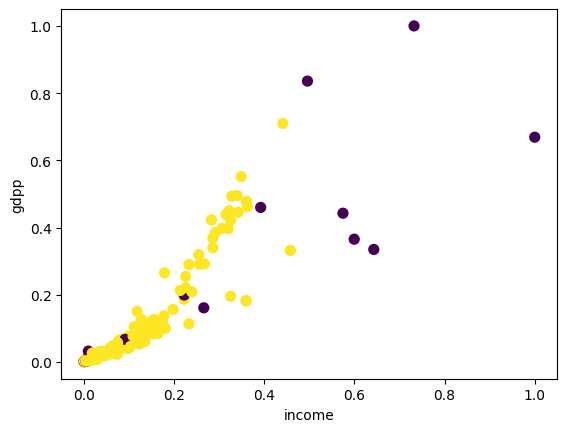

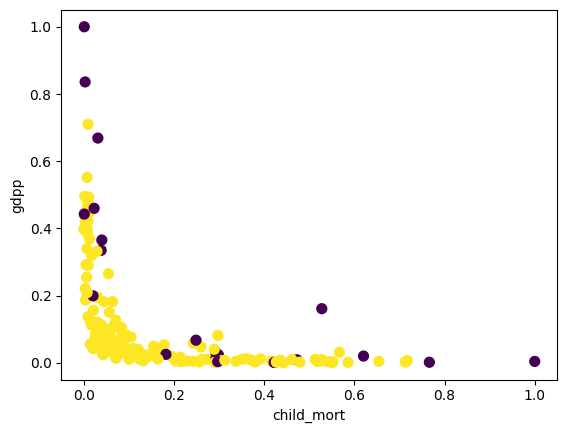

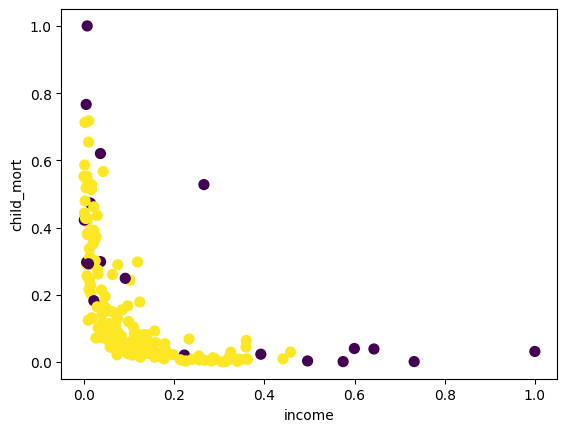

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  83,
        84,  85,  86,  89,  90,  92,  93,  94,  95,  96,  97,  99, 100,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 131,
       134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162,
       163, 164, 165, 166], dtype=int64)

In [185]:
data_dbscan = cluster.DBSCAN(eps=0.3, min_samples=9).fit_predict(normalized_data)
#а тут -1 чомусь
display(data_dbscan)

plt.scatter(normalized_data["income"], normalized_data["gdpp"], c=data_dbscan,s=50)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["child_mort"], normalized_data["gdpp"], c=data_dbscan,s=50)
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["income"], normalized_data["child_mort"], c=data_dbscan,s=50)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.show()


display(np.where(data_dbscan==0)[0])
#обрав жовті
for i in np.where(data_dbscan==0)[0]:
    result_data.iat[2,i]+=1


array([-1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1])

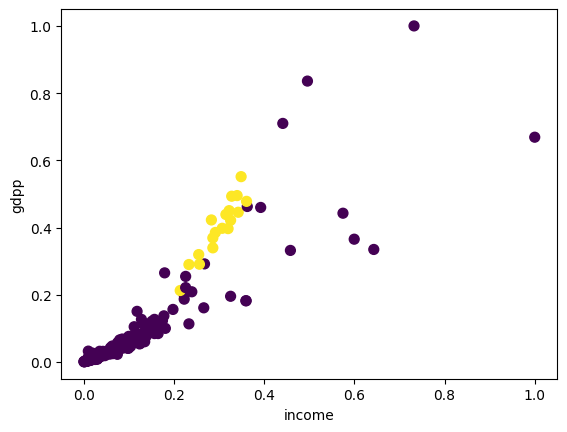

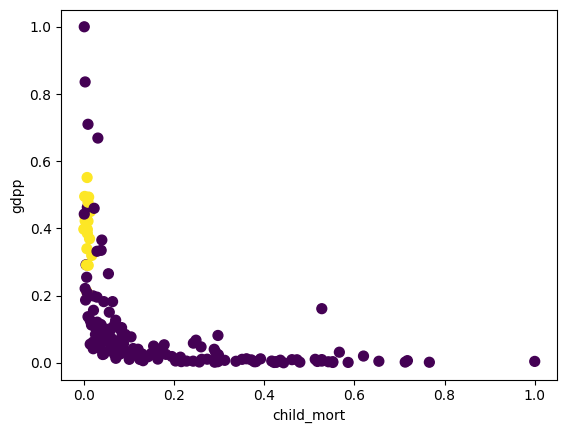

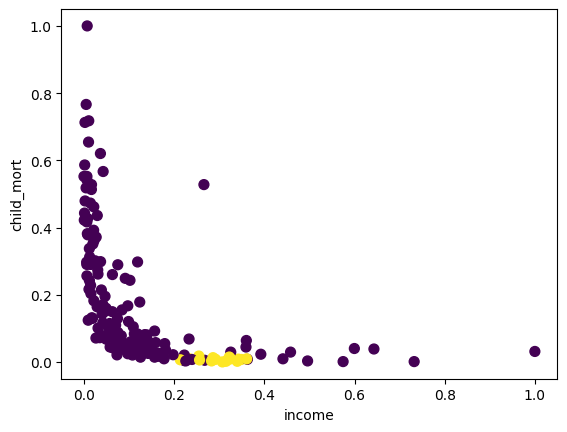

array([  7,   8,  15,  29,  44,  53,  54,  58,  68,  74,  75,  77, 110,
       111, 122, 139, 144, 158], dtype=int64)

In [186]:
data_optics = cluster.OPTICS(eps=0.8, min_samples=10).fit_predict(normalized_data)

display(data_optics)

plt.scatter(normalized_data["income"], normalized_data["gdpp"], c=data_optics,s=50)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["child_mort"], normalized_data["gdpp"], c=data_optics,s=50)
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["income"], normalized_data["child_mort"], c=data_optics,s=50)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.show()


display(np.where(data_optics==0)[0])
#обрав фіолетові
for i in np.where(data_optics==-1)[0]:
    result_data.iat[3,i]+=1


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

47

120

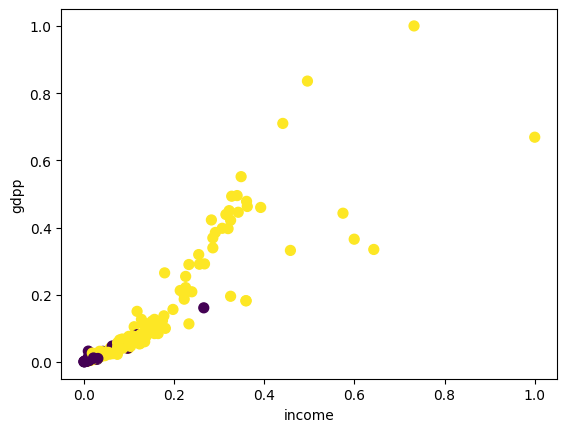

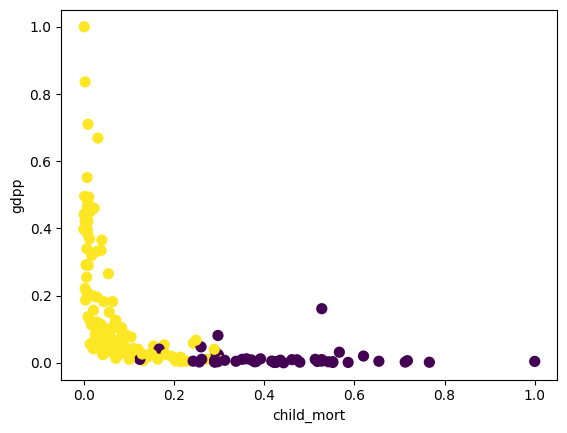

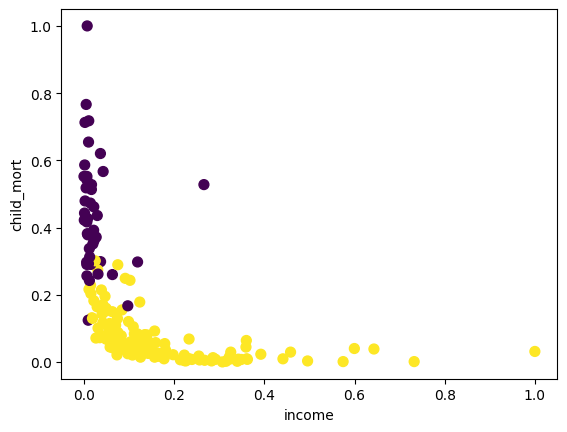

In [187]:
data_spectral = cluster.SpectralClustering(n_clusters=2).fit_predict(normalized_data)

display(data_spectral)
display(len(np.where(data_spectral==0)[0]))
display(len(np.where(data_spectral==1)[0]))

        
plt.scatter(normalized_data["income"], normalized_data["gdpp"], c=data_spectral,s=50)
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["child_mort"], normalized_data["gdpp"], c=data_spectral,s=50)
plt.xlabel('child_mort')
plt.ylabel('gdpp')
plt.show()

plt.scatter(normalized_data["income"], normalized_data["child_mort"], c=data_spectral,s=50)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.show()



#обрав фіолетові
for i in np.where(data_spectral==0)[0]:
    result_data.iat[4,i]+=1


In [188]:
#data_spectral

In [189]:
#len(data_spectral)

In [190]:
#np.where(data_spectral==0)[0]

In [191]:
#for i in np.where(data_spectral==0)[0]:
#    print(i)

In [192]:
result_data.iat[1,0]

1

In [193]:
#result_data.iat[1,0]=1

In [194]:
#result_data.iat[1,0]

In [195]:
display(result_data)

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
methods,,,,,,,,,,,,,,,,,,,,,
AffinityPropagation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birch,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
DBSCAN,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
OPTICS,1,1,1,1,1,1,1,0,0,1,...,1,0,1,1,1,1,1,1,1,1
SpectralClustering,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [202]:
result = result_data.sum()
result.sort_values(ascending=False,inplace=True)
display(result.nlargest(5))

Afghanistan         4
Cameroon            4
Chad                4
Comoros             4
Congo, Dem. Rep.    4
dtype: int64